# Lending club case study

### problem staetement will be documented here


In [1]:
#importing libraries and data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('loan.csv')
desc=pd.read_excel('Data_Dictionary.xlsx')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Understanding

In [2]:
#glace at data

print(data.shape)
data.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#chekcing data columns and info
print(data.columns)
print(data.info())
print("loan status tells us loan is defaulted or not-------",data.loan_status.unique())


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
loan status tells us loan is defaulted or not------- ['Fully Paid' 'Charged Off' 'Current']


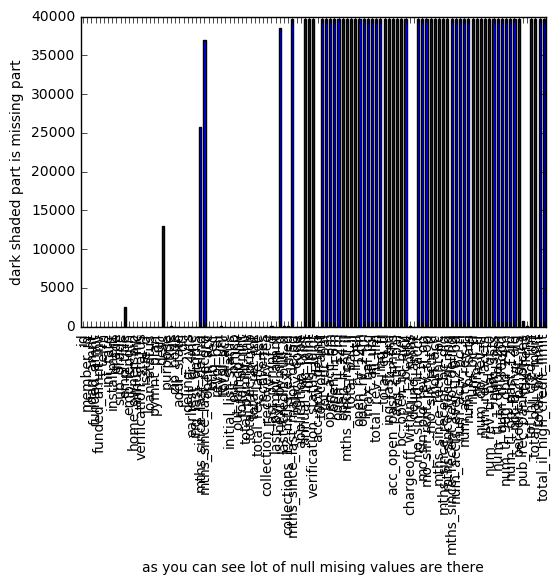

In [4]:
data.isnull().sum().plot(kind='bar')
plt.xlabel("as you can see lot of null mising values are there")
plt.ylabel("dark shaded part is missing part")
plt.show()

#### After examining found loan_status is target column

# Basic cleaning

In [5]:
# removing columns where every entry is null

allnullcols=data.columns[pd.isnull(data).all(axis=0)].tolist()
data=data.drop(allnullcols,axis=1)
print("data shape after removing null columns",data.shape)

data shape after removing null columns (39717, 57)


In [6]:
# columns where unique value is one means no much data in them to consider

uniq1=[]
cols=data.columns.tolist()
for i in cols:
    if len(data[i].unique())==1:
        uniq1.append(i)
        
uniq1

['pymnt_plan',
 'initial_list_status',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'delinq_amnt']

In [7]:
#dropping columns where only one unique value is present

data=data.drop(uniq1,axis=1)

In [8]:
#percentage of missing values column wise.
(data.isnull().sum()/data.shape[0])*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.188786
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
url                            0.000000
desc                          32.577989
purpose                        0.000000
title                          0.025178
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [9]:
#columns where missing values are more than 50%

missing50=data.columns[(data.isnull().sum()/data.shape[0])*100 > 50].tolist()
print(missing50)

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


In [10]:
#dropping columns where values are missing more than 90%

data=data.drop(missing50,axis=1)

In [11]:
#percentage of missing values column wise.

(data.isnull().sum()/data.shape[0])*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.188786
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
url                            0.000000
desc                          32.577989
purpose                        0.000000
title                          0.025178
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [12]:
print(data.shape)
# So we are ended up with # columns after removing these missing values
data.head()

(39717, 48)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0


In [13]:
# maximum missing values in any given row
print("maximum missing values in any given row are ",data.isnull().sum(axis=1).max())

# so every row matters now

maximum missing values in any given row are  6


In [14]:
#no of unique entries in every column

cols=data.columns.tolist()
for i in cols:
    print("no of unique values in ",i,"-------------",len(data[i].unique()))
        

no of unique values in  id ------------- 39717
no of unique values in  member_id ------------- 39717
no of unique values in  loan_amnt ------------- 885
no of unique values in  funded_amnt ------------- 1041
no of unique values in  funded_amnt_inv ------------- 8205
no of unique values in  term ------------- 2
no of unique values in  int_rate ------------- 371
no of unique values in  installment ------------- 15383
no of unique values in  grade ------------- 7
no of unique values in  sub_grade ------------- 35
no of unique values in  emp_title ------------- 28822
no of unique values in  emp_length ------------- 12
no of unique values in  home_ownership ------------- 5
no of unique values in  annual_inc ------------- 5318
no of unique values in  verification_status ------------- 3
no of unique values in  issue_d ------------- 55
no of unique values in  loan_status ------------- 3
no of unique values in  url ------------- 39717
no of unique values in  desc ------------- 26529
no of uniqu

## Advanced cleaning

In [15]:
pd.DataFrame(data.describe())

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39661.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,2.000000,0.0


### There are few columns we need to drop

In [16]:
# id column is just random it never decides the outcome
data=data.drop('id',axis=1)

# member_id column is same as id, so we will drop that
data=data.drop('member_id',axis=1)

# desc column is long and doesn't contain significance in predicting outcome
data=data.drop('desc',axis=1)

# column emp_title doesn't provide any significance to predicting 
data=data.drop('emp_title',axis=1)

# url column is just random variable url never decicede defaulter
data=data.drop('url',axis=1)

#title columns contains few thousands of unique values
data=data.drop('title',axis=1)

#only zeros and nan are present in collections_12_mths_ex_med
data=data.drop('collections_12_mths_ex_med',axis=1)

#only zeros and nan are present in chargeoff_within_12_mths
data=data.drop('chargeoff_within_12_mths',axis=1)

#only zeros and nan are present in tax_liens
data=data.drop('tax_liens',axis=1)

data=data.drop('last_pymnt_d',axis=1)
data=data.drop('last_credit_pull_d',axis=1)
data=data.drop('revol_util',axis=1)
data=data.drop('zip_code',axis=1)
data=data.drop('out_prncp',axis=1)

In [17]:
print("so we endedup with this varibles after cleaning",data.shape[1])

so we endedup with this varibles after cleaning 34


In [18]:
# these are the columns with few missing values

missing=data.columns[data.isnull().sum()>0].tolist()
missing

['pub_rec_bankruptcies']

In [19]:
#since only column with missing values is pub_rec_backrupties and have only 3 unique values
# we can't impute mean here so we go with mode since mode has more chances of occurances
data['pub_rec_bankruptcies']=data['pub_rec_bankruptcies'].fillna(0)

In [20]:
dtype_obj=[]
dtype_float=[]
for i in data.columns:
    #print("column name :",i)
    if data[i].describe().dtype==object:
        dtype_obj.append(i)
    if data[i].describe().dtype==float:
        dtype_float.append(i)


## we dropped columns now lets drop rows

In [21]:
#Since we are concerned about loan_status we will start there

print("since we have 3 unique values in loan_status")
print(data.loan_status.unique().tolist())

# current status rows is not required since it doesn't tell us whether loan is default or not 

since we have 3 unique values in loan_status
['Fully Paid', 'Charged Off', 'Current']


In [22]:
# removing rows where loan status is current
data=data[data.loan_status!='Current']

In [23]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0


## lets clean categorical columns to encode numerical values 

columns with object types are most likely to be categorical and we want extract a metric out of it. Where too many categorical values are present

In [24]:
#columns with object data type and they contain categorical data and we need to clean it properly
dtype_obj

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line']

In [25]:
data[dtype_obj].head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,AZ,Jan-85
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,GA,Apr-99
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,IL,Nov-01
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,CA,Feb-96
5,36 months,7.90%,A,A4,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,AZ,Nov-04


In [26]:
#since term is given in months I think we can numeric values to work than objecct 
data.term=data.term.apply(lambda x:x.split()[0])

In [27]:
# making intrest as int since we want a better idea than digging deep
data.int_rate=data.int_rate.apply(lambda x:x.split('.')[0])

In [28]:
#emp_length is given in years So I wanted to remove that years in every element for sanity
import re 
def extract(x):
    num=0
    for i in x:
        if i.isdigit():
            num=num+int(i)
            num=num*10
    return num//10
            
    
data.emp_length=data.emp_length.apply(lambda x:extract(x))

In [29]:
# just wanted to decrease categories from months-year to month
data.issue_d=data.issue_d.apply(lambda x:x.split('-')[0])

In [30]:
print("there are ",len(data.purpose.unique())," types of cateogries in purpose column")
print("thats fine since we have more than 35k examples and 12 categories")

there are  14  types of cateogries in purpose column
thats fine since we have more than 35k examples and 12 categories


In [31]:
data.earliest_cr_line=data.earliest_cr_line.apply(lambda x:x.split('-')[0])

In [32]:
#lets see what we are  left with 
data.shape

(38577, 34)

## Univariate analysis

*********************************************************************
0
loan_amnt
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
Data type : float64


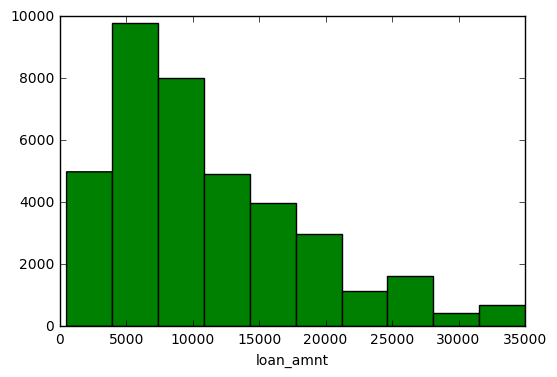

*********************************************************************
1
funded_amnt
The total amount committed to that loan at that point in time.
count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
Data type : float64


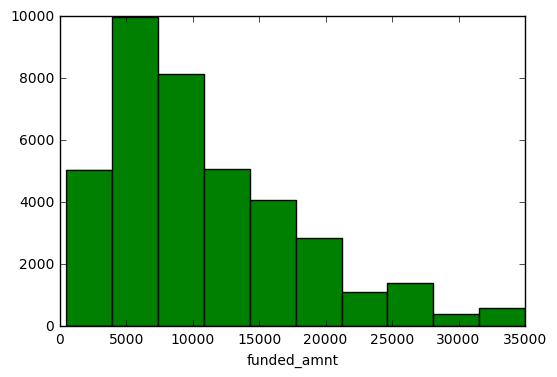

*********************************************************************
2
funded_amnt_inv
The total amount committed by investors for that loan at that point in time.
count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64
Data type : float64


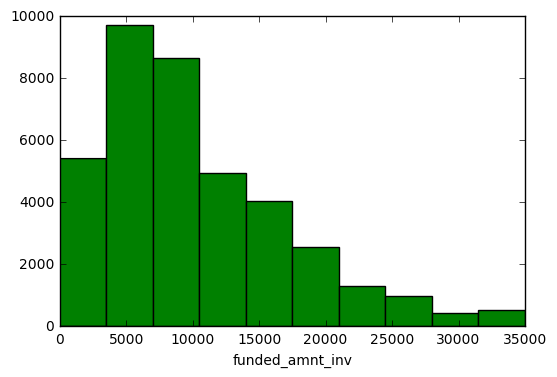

*********************************************************************
3
TERM
The number of payments on the loan. Values are in months and can be either 36 or 60.
count     38577
unique        2
top          36
freq      29096
Name: term, dtype: object
UNIQUE VALUES : ['36', '60']


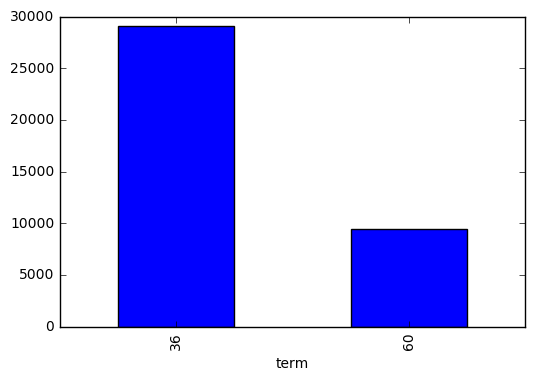

*********************************************************************
4
INT_RATE
Interest Rate on the loan
count     38577
unique       20
top          11
freq       4337
Name: int_rate, dtype: object
UNIQUE VALUES : ['10', '15', '13', '7', '18', '21', '12', '14', '9', '16', '6', '11', '8', '19', '17', '20', '23', '22', '24', '5']


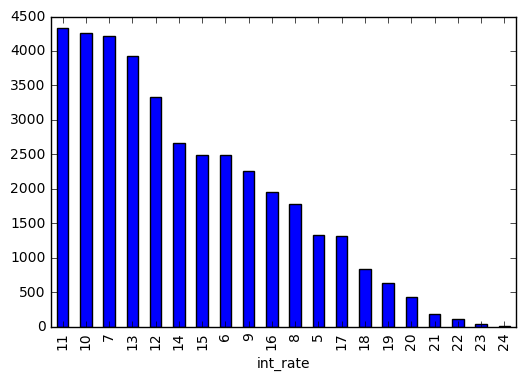

*********************************************************************
5
installment
The monthly payment owed by the borrower if the loan originates.
count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64
Data type : float64


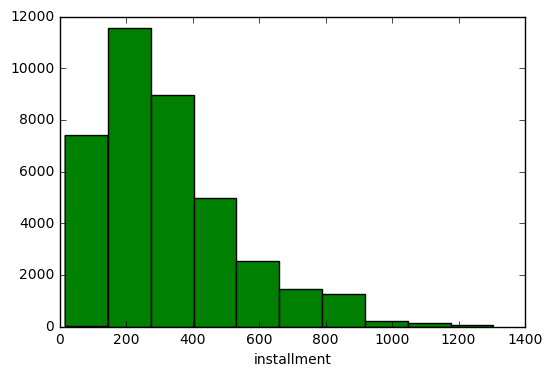

*********************************************************************
6
GRADE
LC assigned loan grade
count     38577
unique        7
top           B
freq      11675
Name: grade, dtype: object
UNIQUE VALUES : ['B', 'C', 'A', 'E', 'F', 'D', 'G']


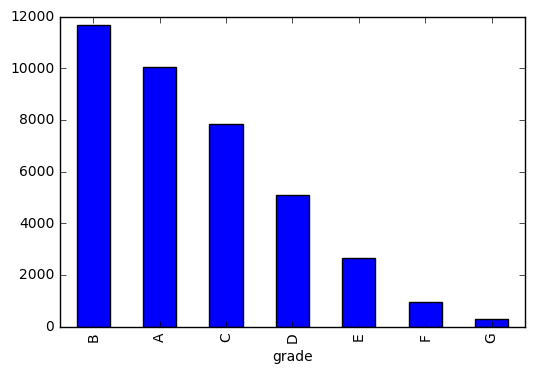

*********************************************************************
7
SUB_GRADE
LC assigned loan subgrade
count     38577
unique       35
top          A4
freq       2873
Name: sub_grade, dtype: object
UNIQUE VALUES : ['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1', 'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3', 'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4', 'G5', 'G3']


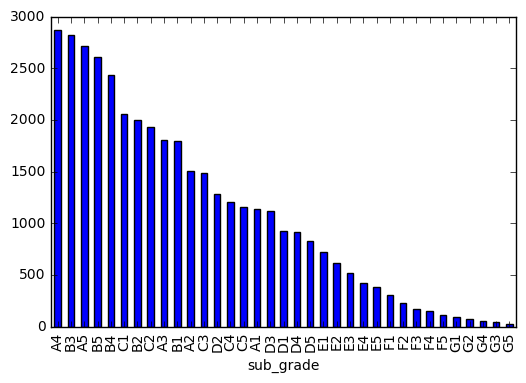

*********************************************************************
8
emp_length
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
count    38577.000000
mean         4.925526
std          3.453921
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64
Data type : float64


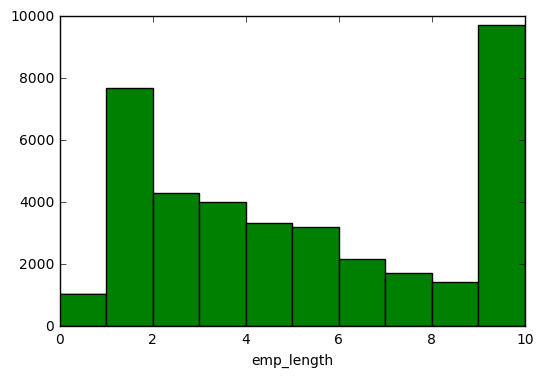

*********************************************************************
9
HOME_OWNERSHIP
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
count     38577
unique        5
top        RENT
freq      18480
Name: home_ownership, dtype: object
UNIQUE VALUES : ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']


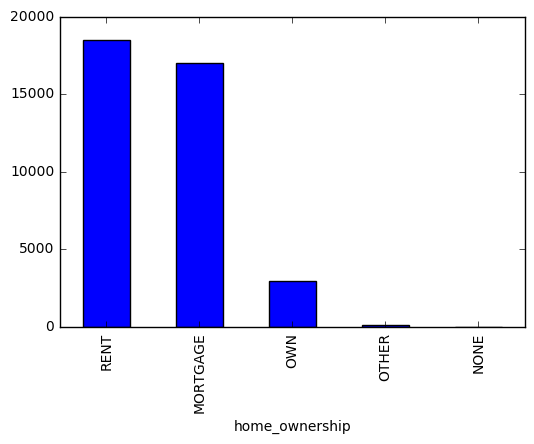

*********************************************************************
10
annual_inc
The self-reported annual income provided by the borrower during registration.
count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
Data type : float64


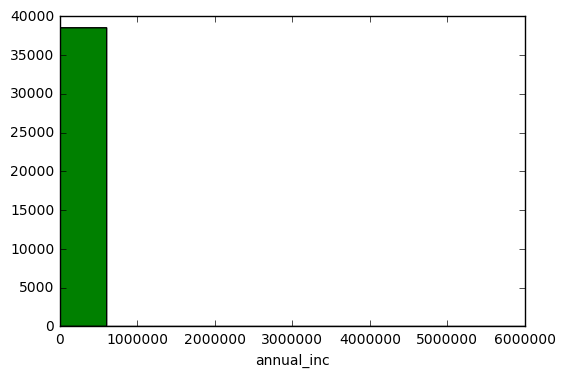

*********************************************************************
11
VERIFICATION_STATUS
Indicates if income was verified by LC, not verified, or if the income source was verified
count            38577
unique               3
top       Not Verified
freq             16694
Name: verification_status, dtype: object
UNIQUE VALUES : ['Verified', 'Source Verified', 'Not Verified']


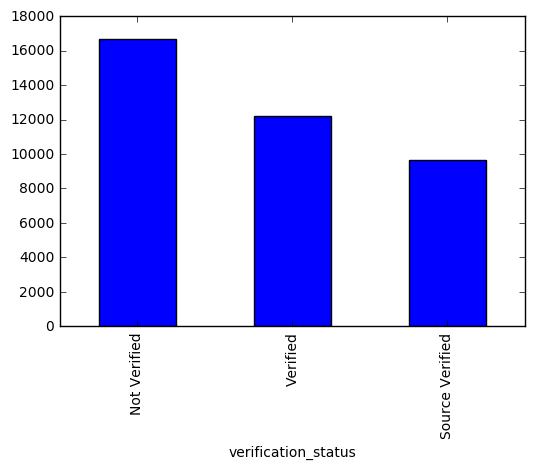

*********************************************************************
12
ISSUE_D
The month which the loan was funded
count     38577
unique       12
top         Dec
freq       4215
Name: issue_d, dtype: object
UNIQUE VALUES : ['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan']


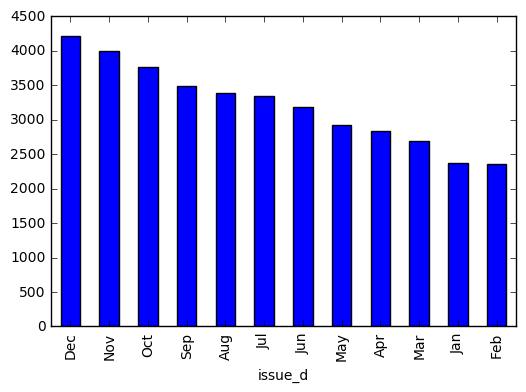

*********************************************************************
13
LOAN_STATUS
Current status of the loan
count          38577
unique             2
top       Fully Paid
freq           32950
Name: loan_status, dtype: object
UNIQUE VALUES : ['Fully Paid', 'Charged Off']


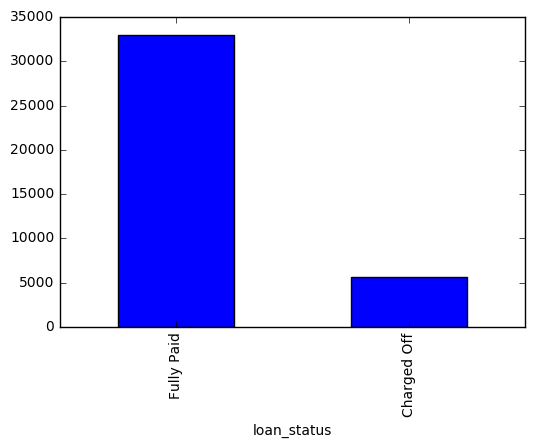

*********************************************************************
14
PURPOSE
A category provided by the borrower for the loan request. 
count                  38577
unique                    14
top       debt_consolidation
freq                   18055
Name: purpose, dtype: object
UNIQUE VALUES : ['credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house', 'renewable_energy', 'educational']


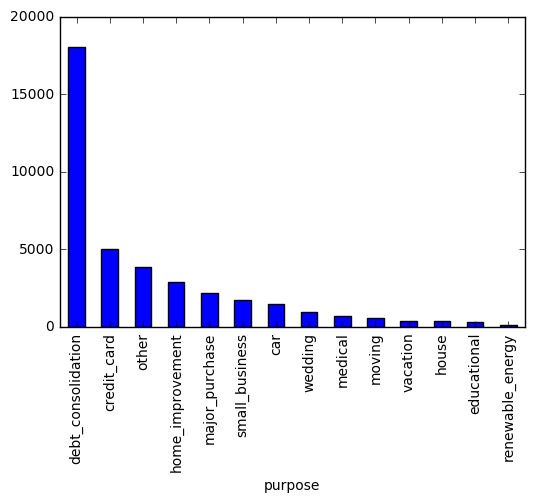

*********************************************************************
15
ADDR_STATE
The state provided by the borrower in the loan application
count     38577
unique       50
top          CA
freq       6949
Name: addr_state, dtype: object
UNIQUE VALUES : ['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL', 'NY', 'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA', 'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC', 'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS', 'TN', 'IA', 'NE', 'ID', 'IN', 'ME']


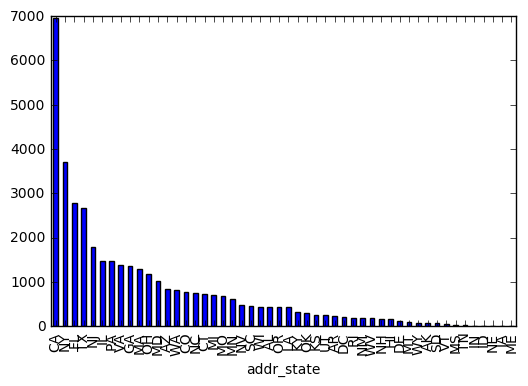

*********************************************************************
16
dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64
Data type : float64


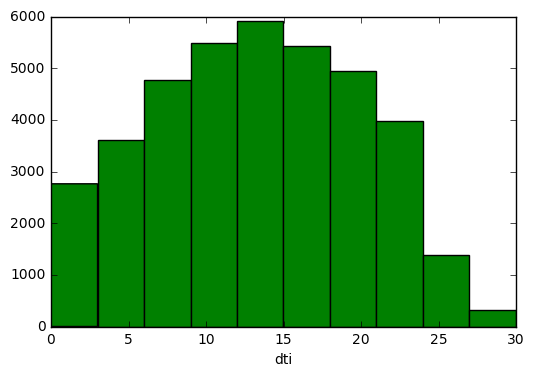

*********************************************************************
17
delinq_2yrs
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
count    38577.000000
mean         0.146668
std          0.492271
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64
Data type : float64


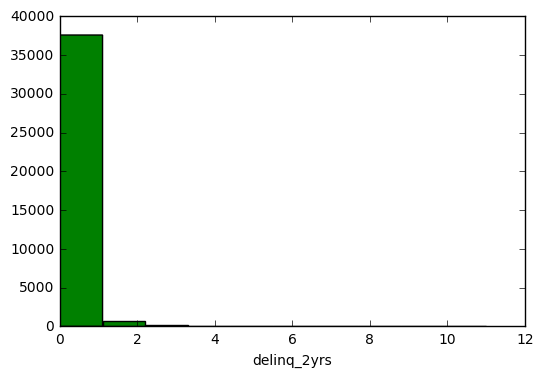

*********************************************************************
18
EARLIEST_CR_LINE
The month the borrower's earliest reported credit line was opened
count     38577
unique       12
top         Oct
freq       3967
Name: earliest_cr_line, dtype: object
UNIQUE VALUES : ['Jan', 'Apr', 'Nov', 'Feb', 'Jul', 'Sep', 'Oct', 'May', 'Aug', 'Jun', 'Dec', 'Mar']


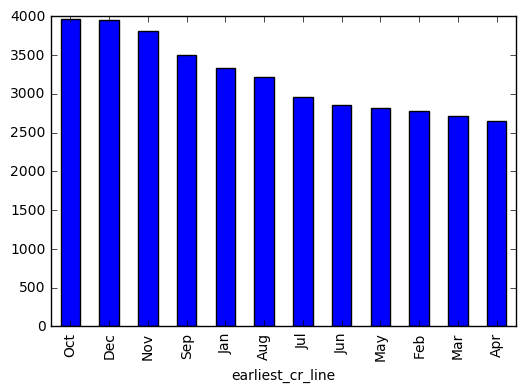

*********************************************************************
19
inq_last_6mths
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
count    38577.000000
mean         0.871737
std          1.071546
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64
Data type : float64


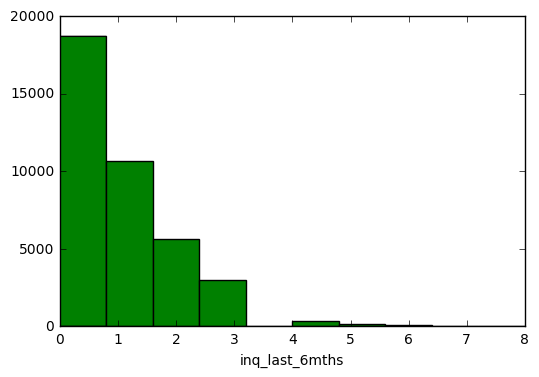

*********************************************************************
20
open_acc
The number of open credit lines in the borrower's credit file.
count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64
Data type : float64


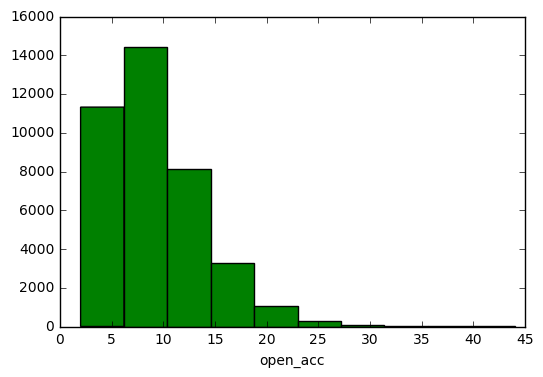

*********************************************************************
21
pub_rec
Number of derogatory public records
count    38577.000000
mean         0.055422
std          0.237804
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64
Data type : float64


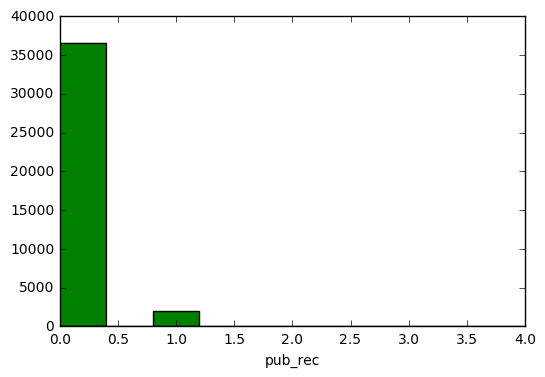

*********************************************************************
22
revol_bal
Total credit revolving balance
count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64
Data type : float64


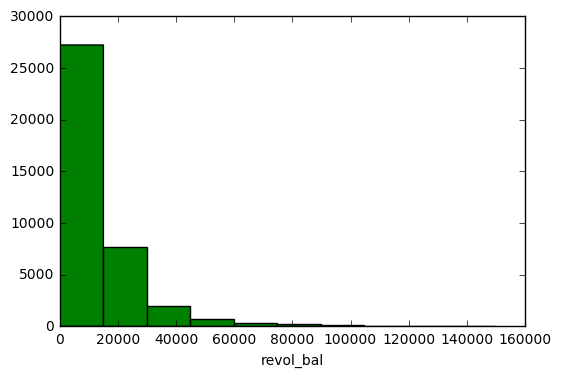

*********************************************************************
23
total_acc
The total number of credit lines currently in the borrower's credit file
count    38577.000000
mean        22.052648
std         11.425861
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64
Data type : float64


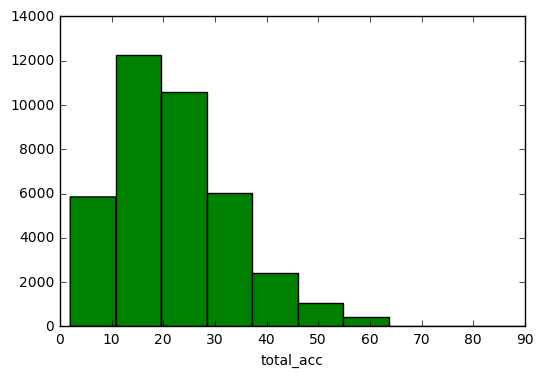

*********************************************************************
24
out_prncp_inv
Remaining outstanding principal for portion of total amount funded by investors
count    38577.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp_inv, dtype: float64
Data type : float64


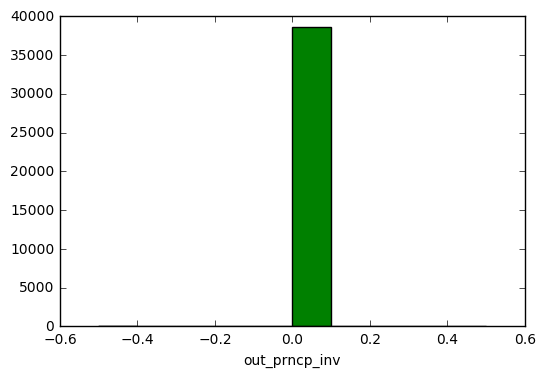

*********************************************************************
25
total_pymnt
Payments received to date for total amount funded
count    38577.000000
mean     11866.970365
std       8809.856227
min          0.000000
25%       5513.497338
50%       9674.048405
75%      16136.952430
max      58563.679930
Name: total_pymnt, dtype: float64
Data type : float64


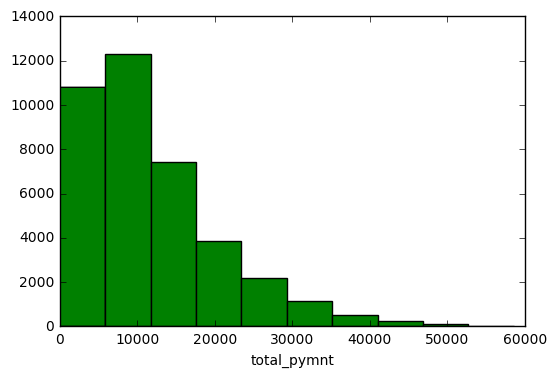

*********************************************************************
26
total_pymnt_inv
Payments received to date for portion of total amount funded by investors
count    38577.000000
mean     11271.196153
std       8700.845592
min          0.000000
25%       5019.590000
50%       9066.660000
75%      15329.780000
max      58563.680000
Name: total_pymnt_inv, dtype: float64
Data type : float64


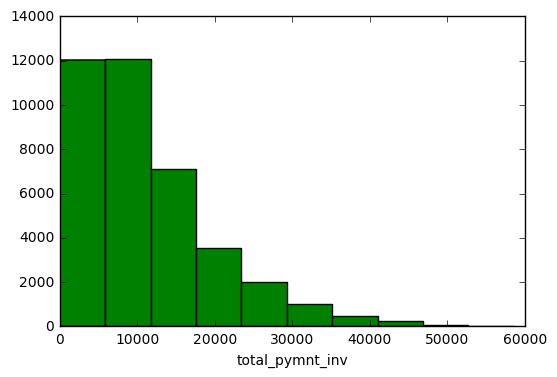

*********************************************************************
27
total_rec_prncp
Principal received to date
count    38577.000000
mean      9648.322898
std       7009.381200
min          0.000000
25%       4500.000000
50%       8000.000000
75%      13175.000000
max      35000.020000
Name: total_rec_prncp, dtype: float64
Data type : float64


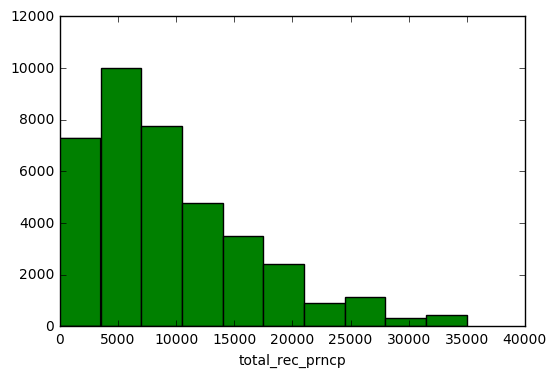

*********************************************************************
28
total_rec_int
Interest received to date
count    38577.000000
mean      2119.243370
std       2389.499511
min          0.000000
25%        643.990000
50%       1300.450000
75%       2671.980000
max      23563.680000
Name: total_rec_int, dtype: float64
Data type : float64


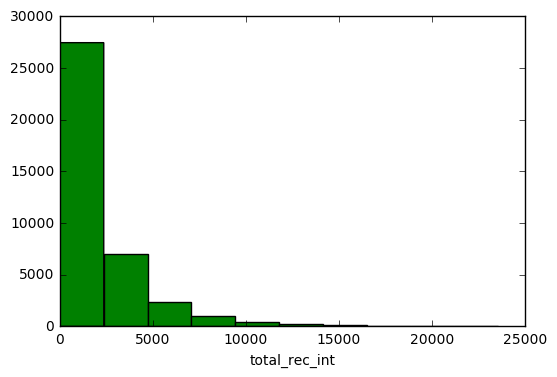

*********************************************************************
29
total_rec_late_fee
Late fees received to date
count    38577.000000
mean         1.368634
std          7.315880
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64
Data type : float64


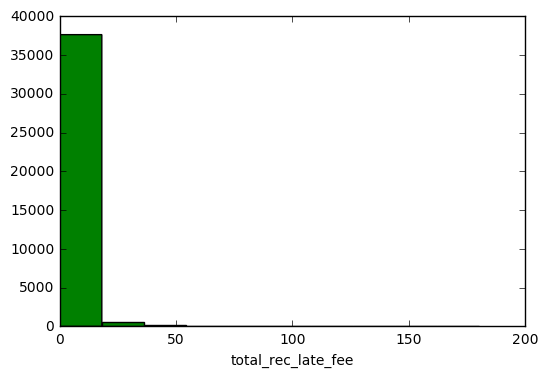

*********************************************************************
30
recoveries
post charge off gross recovery
count    38577.000000
mean        98.035545
std        698.650182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64
Data type : float64


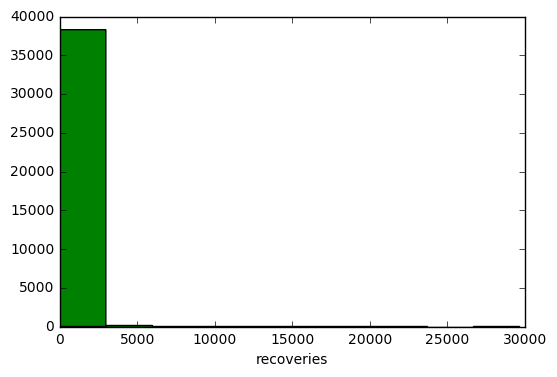

*********************************************************************
31
collection_recovery_fee
post charge off collection fee
count    38577.000000
mean        12.772728
std        150.836853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64
Data type : float64


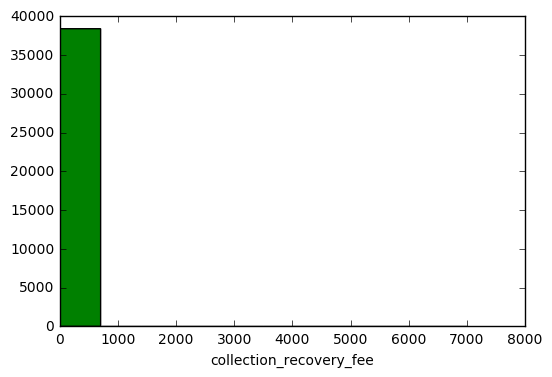

*********************************************************************
32
last_pymnt_amnt
Last total payment amount received
count    38577.000000
mean      2746.243218
std       4494.648131
min          0.000000
25%        217.420000
50%        568.260000
75%       3447.250000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64
Data type : float64


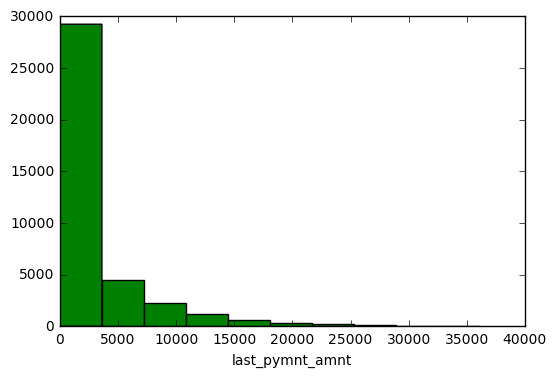

*********************************************************************
33
pub_rec_bankruptcies
Number of public record bankruptcies
count    38577.000000
mean         0.042694
std          0.202809
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64
Data type : float64


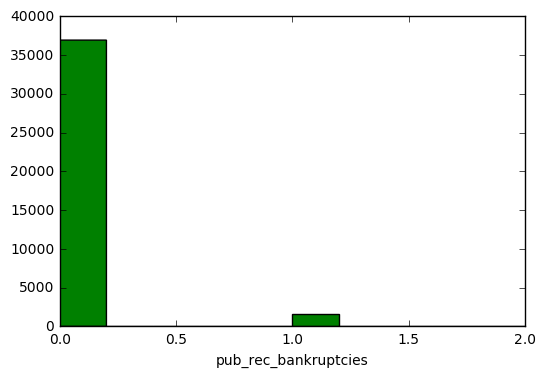

In [33]:
count=0
for i in data.columns:
    print("*********************************************************************")
    
    print(count)
    count+=1
    if data[i].describe().dtype==object:
        print(str.upper(i))
        print(desc[desc['LoanStatNew']==i]['Description'].iloc[0])
        print(data[i].describe())
        print("UNIQUE VALUES :",data[i].unique().tolist())
        data[i].value_counts().plot(kind='bar')
        plt.xlabel(i)
        plt.show()
        continue
    if data[i].describe().dtype==float:
        print(i)
        print(desc[desc['LoanStatNew']==i]['Description'].iloc[0])
        print(data[i].describe())
        print("Data type :",data[i].describe().dtype)
        plt.hist(data[i],color='green',rwidth=5)
        plt.xlabel(i)
        plt.show()
        continue
    else:
        print(i)
        print(desc[desc['LoanStatNew']==i]['Description'].iloc[0])
        print("Data type :",data[i].describe().dtype)
    

### Lets see correlation between each variable and loan_status

In [34]:

y=data.loan_status.astype('category').cat.codes
s=[[]]
for i in data.columns:
    about=desc[desc['LoanStatNew']==i]['Description'].iloc[0]
    if data[i].describe().dtype==object:
        data[i]=data[i].astype('category').cat.codes
    res=pd.concat([data[i],y],axis=1)
    s.append([i,res.corr().min()[0],about])

    
corel=pd.DataFrame(s)
corel=corel.dropna()
corel.columns=['variable','correlation with loan_status','description']
corel.sort_values(by='correlation with loan_status')
corel.style.background_gradient()

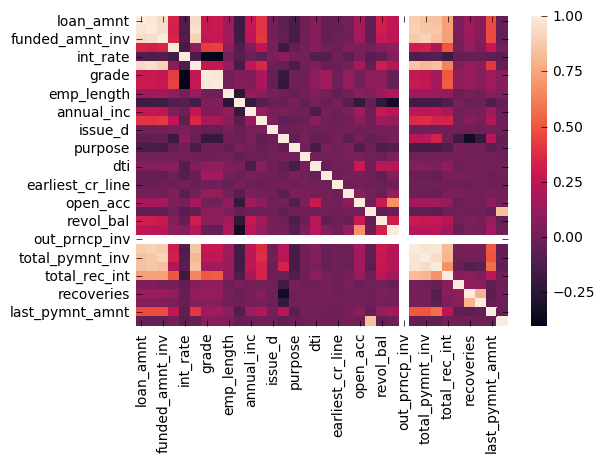

In [35]:
sns.heatmap(data.corr())
plt.show()